![HenryLogo](https://d31uz8lwfmyn8g.cloudfront.net/Assets/logo-henry-white-lg.png)

​
# <h1 align="center">**`Proyecto Individual 2`**
# <h1 align="center">*`Luz Mayte Estrada Torvisco`*


<p align="center">
<img src="https://www.ibm.com/blogs/client-voices/wp-content/uploads/2019/09/Glinnt.jpg"   
>
</p>


</p>

​
¡Bienvenidos a mi segundo proyecto! En este proyecto pongo a prueba mis habilidades en el campo de la predicción. Se usó las métricas de precisión and recalls para medir el performance de mi modelo. 

## **Descripción del problema**

Un importante Centro de Salud me ha contratado con el fin de poder predecir si un paciente tendrá una estancia hospitalaria prolongada o no, utilizando la información contenida en el dataset asociado, la cual recaba una muestra histórica de sus pacientes, para poder administrar la demanda de camas en el hospital según la condición de los pacientes recientemente ingresados. 

Para esto, se define que un paciente posee estancia hospitalaria prolongada si ha estado hospitalizado más de 8 días. Por lo que debe generar dicha variable categórica y luego categorizar los pacientes según las variables que usted considere necesarias, justificando dicha elección. 



## **Metodología**

Considerando que me piden analizar si la estancia hospitalaria es prolongada o no, este problema se trata de un análisis de clasificación binaria. La metodología de trabajo se muestra líneas debajo. Se hizo la descarga de los datos, el análisis exploratorio, la división en sets de entrenamiento y prueba, la prueba de dos modelos: SGD, random forest classifier, y finalmente se hizo la predicción en el set de prueba.


## **Resultados**

Se logró un precision de 0.8061 y un precission de 0.8270 con el método de Random Forest Classifier



## <span style="color:green">1. Descargar los datos</span>

In [2]:
##Importamos las librerías principales

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns


from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder

In [3]:
## Definimos una función para extaer los datos
#DWONLOAD_ROOT es la base del Github donde se estará descargando la base de datos.

data_base= "hospitalizaciones_train.csv"
test="hospitalizaciones_test.csv"
DOWNLOAD_ROOT= "https://raw.githubusercontent.com/mayteet/Proyecto_Individual_2/main/"


#Complementos con la dirección específica de la base de datos que queremos.

def extraer_datos(root,database):
    csv_path= root+database
    return pd.read_csv(csv_path)

In [4]:

# Archivo con el que se hace la prueba final
prueba_final= extraer_datos(DOWNLOAD_ROOT, test)

#Archivo para revisar datos
df1= extraer_datos(DOWNLOAD_ROOT, data_base)


## <span style="color:green">2. Análisis exploratorio </span>

In [5]:
#Analizamos la calidad de los datos para identificar valores vacíos y tipos de variables
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410000 entries, 0 to 409999
Data columns (total 15 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Available Extra Rooms in Hospital  410000 non-null  int64  
 1   Department                         410000 non-null  object 
 2   Ward_Facility_Code                 410000 non-null  object 
 3   doctor_name                        410000 non-null  object 
 4   staff_available                    410000 non-null  int64  
 5   patientid                          410000 non-null  int64  
 6   Age                                410000 non-null  object 
 7   gender                             410000 non-null  object 
 8   Type of Admission                  410000 non-null  object 
 9   Severity of Illness                410000 non-null  object 
 10  health_conditions                  410000 non-null  object 
 11  Visitors with Patient              4100

👀 Se observa que:
- Datos limpios
- Observamos que hay 6 columnas con datos numéricos
- Patient id es un dato que podría influir negativamente en algún modelo que se quiera implementar

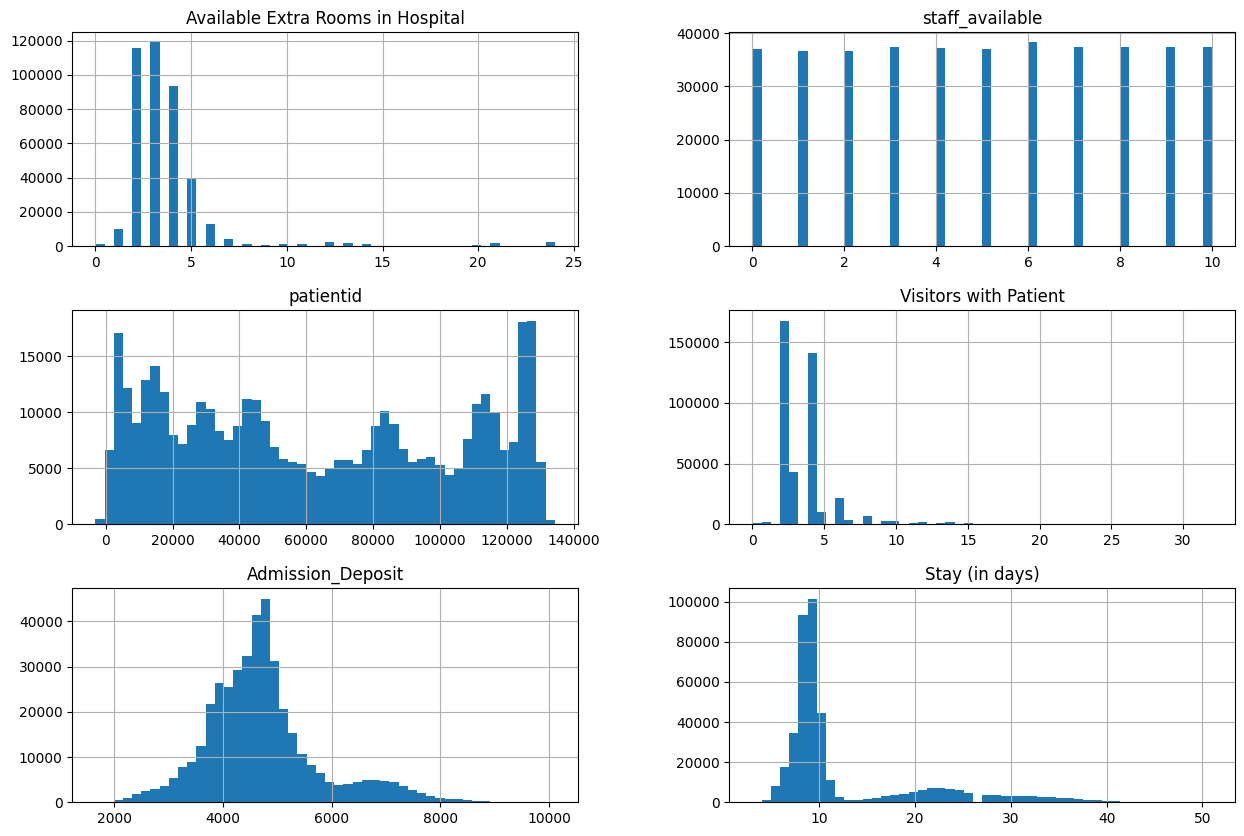

In [6]:
#Análisis de datos numéricos
#Histogramas
%matplotlib inline
df1.hist(bins=50, figsize=(15,10))
plt.show()

Observamos que:
- Las habitaciones extras en los hospitales se encuentra entre 3-5.
- Los pacientes tienen entre 3-5 visitas.
- El depósito de admisión se encuentra en mayor cantidad entre los 4000-6000 unidades monetarias
- El periodo de estadía de un paciente es menor a 10 días

Análisis de los datos categóricos de forma individual

<AxesSubplot: xlabel='gender', ylabel='Count'>

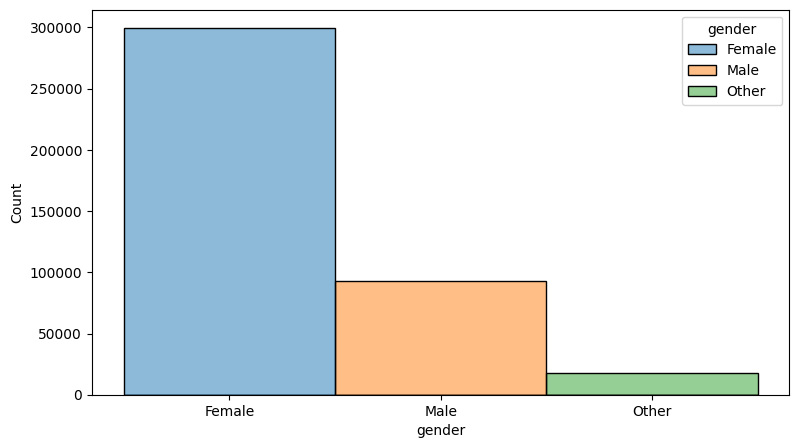

In [9]:
#Genero
plt.figure(figsize=(9,5))
sns.histplot(data=df1, x="gender", hue="gender")

<AxesSubplot: xlabel='Type of Admission', ylabel='Count'>

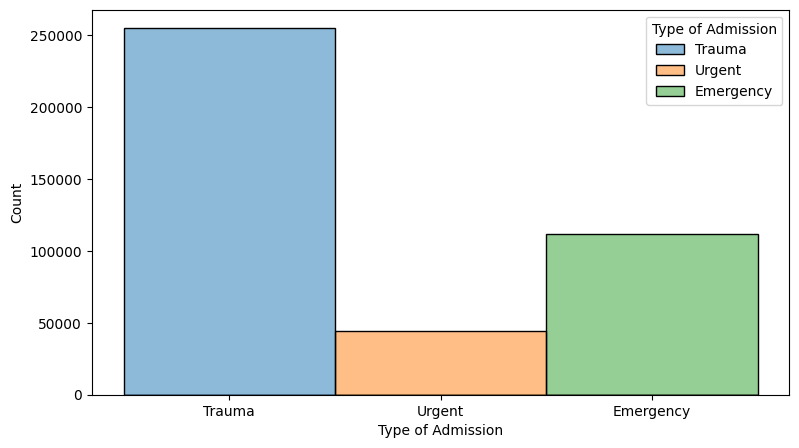

In [10]:
plt.figure(figsize=(9,5))
sns.histplot(data=df1, x="Type of Admission", hue="Type of Admission")

<AxesSubplot: xlabel='Severity of Illness', ylabel='Count'>

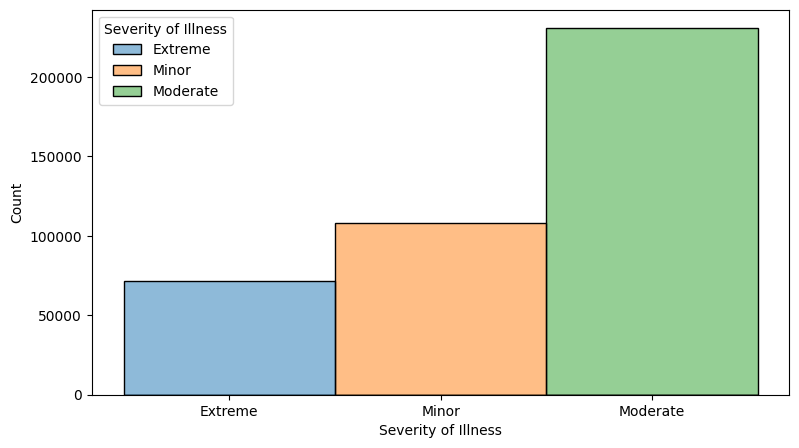

In [11]:
plt.figure(figsize=(9,5))
sns.histplot(data=df1, x="Severity of Illness", hue="Severity of Illness")

<AxesSubplot: xlabel='health_conditions', ylabel='Count'>

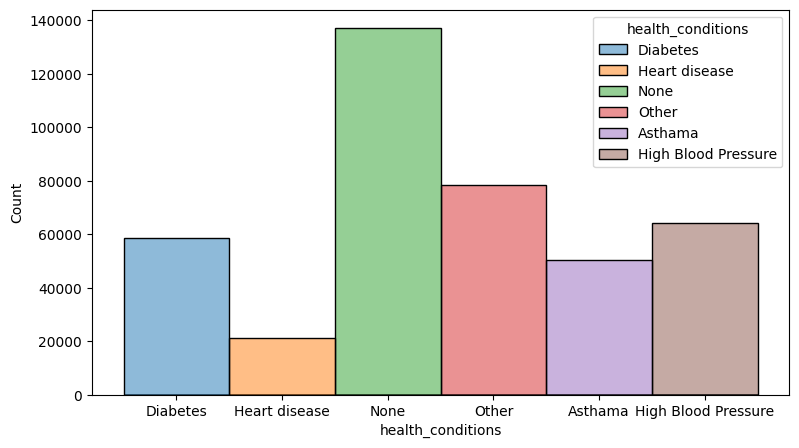

In [12]:
plt.figure(figsize=(9,5))
sns.histplot(data=df1, x="health_conditions", hue="health_conditions")

<AxesSubplot: xlabel='Insurance', ylabel='Count'>

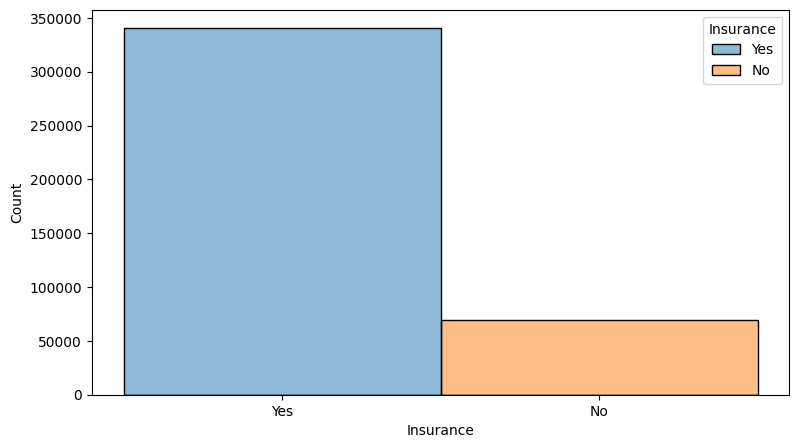

In [13]:
plt.figure(figsize=(9,5))
sns.histplot(data=df1, x="Insurance", hue="Insurance")

De los datos categóricos se observa que:
- El 80% aprox de entradas se encuentran en el rango de 21-50 años.
- Entran mucho más mujeres que hombres.
- La principal causa de entrada es por trauma y el nivel de severidad es moderado.
- Casi un 30% entra sin condiciones médicas preexistentes.
- Más del 80% cuenta con seguro

Análisis de los datos categóricos en relación con la variable a predecir

<AxesSubplot: xlabel='Age', ylabel='Stay (in days)'>

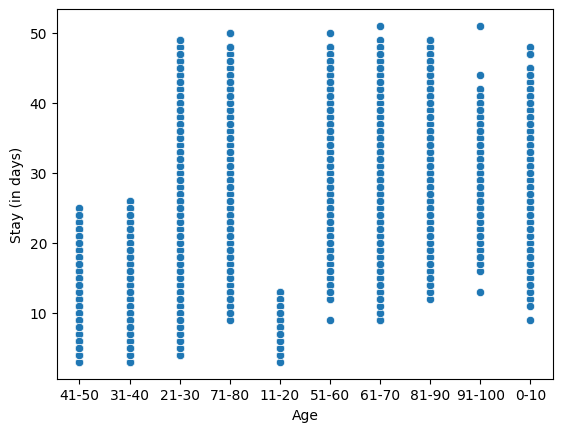

In [14]:
# Age and stay in hospital
sns.scatterplot(data= df1, x="Age", y="Stay (in days)")

<AxesSubplot: xlabel='gender', ylabel='Stay (in days)'>

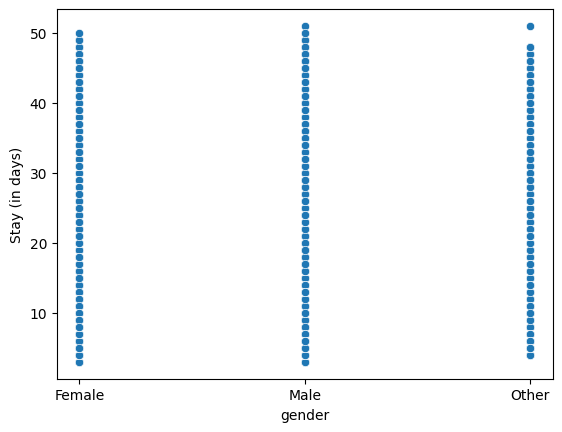

In [15]:
sns.scatterplot(data= df1, x="gender", y="Stay (in days)")

<AxesSubplot: xlabel='Department', ylabel='Stay (in days)'>

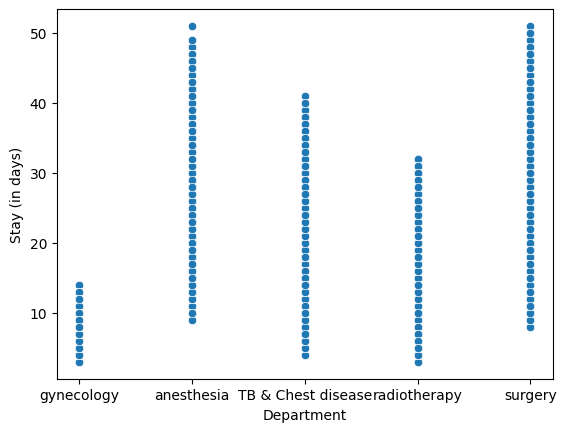

In [16]:
sns.scatterplot(data= df1, x="Department", y="Stay (in days)")

<AxesSubplot: xlabel='doctor_name', ylabel='Stay (in days)'>

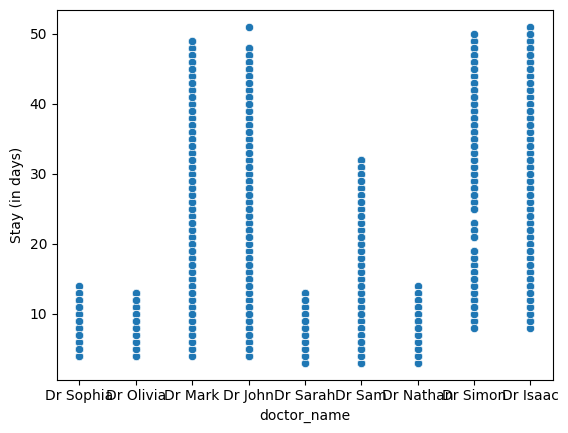

In [17]:
sns.scatterplot(data= df1, x="doctor_name", y="Stay (in days)")

<AxesSubplot: xlabel='Severity of Illness', ylabel='Stay (in days)'>

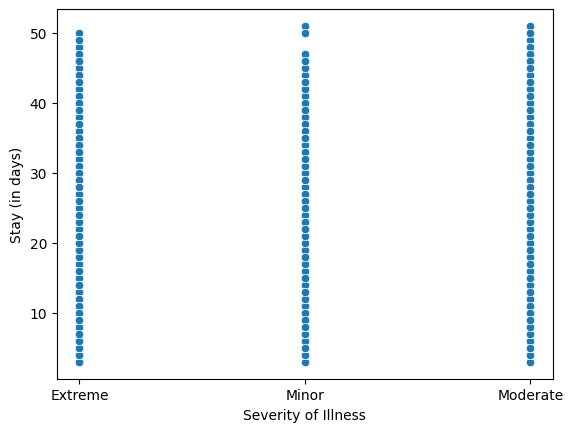

In [18]:
sns.scatterplot(data= df1, x="Severity of Illness", y="Stay (in days)")

<AxesSubplot: xlabel='Type of Admission', ylabel='Stay (in days)'>

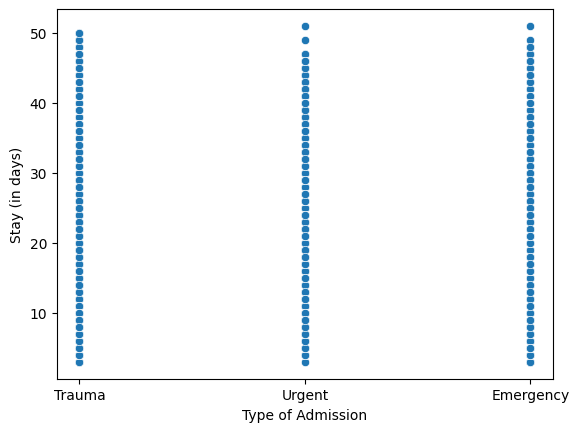

In [19]:
sns.scatterplot(data= df1, x="Type of Admission", y="Stay (in days)")

Del análisis de relación con la variable de interés:
- Las personas en el rango de 31-50 años pasan menos de 26 días en el hospital. 
- Las personas en el rango de 11-20 pasan menos de 13 días en el hospital.

- El tiempo de estancia en ginecología es menor a 15 días
- El tiempo de estancia en anesthesia es mayor a 10 días
- El tiempo en TB ches es menor a 40 días
- El tiempo en radiotherapia es menor a 30 días
- El tiempo en cirugía es mayor a 10 días

- Las doctores Sofia, Olivia, Sara, Nathan, atienden pacientes que estarán menos de 15 días

## <span style="color:green">3. Limpieza de datos y Train Test Split</span>

In [20]:
# Arreglamos los datos

#Definimos la función label encoder para tratar los datos categoricos

def label_encoder(datos_categoria):
    le= LabelEncoder()
    df1[datos_categoria]=le.fit_transform(df1[datos_categoria])
    
#Definimos las variables categóricas de interés

cat=["Department", "Ward_Facility_Code", "doctor_name","Age", "gender", "Type of Admission", "Severity of Illness", "health_conditions", "Insurance"]

#Convertimos las variables clases a numéricas
for l in cat:
    label_encoder(l)


#Convertimos la columna Stay (in days) en valores de 0 y 1
df1["Tipo_estadia"]= np.where(df1["Stay (in days)"] <=8, 0,1)
    

#Quitamos columnas de no interés (patientid, Stay (in days))
df1= df1.drop(["Stay (in days)", "patientid"], axis=1)

In [21]:
df1

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,Tipo_estadia
0,4,2,3,8,0,4,0,1,0,1,4,1,2966.408696,0
1,4,2,1,8,2,3,0,1,1,2,2,0,3554.835677,1
2,2,2,1,8,8,2,0,1,0,1,2,1,5624.733654,0
3,4,2,3,4,7,3,0,2,2,4,4,0,4814.149231,0
4,2,1,4,2,10,7,1,1,2,1,2,0,5169.269637,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409995,1,2,3,6,1,3,0,1,1,0,3,1,3902.291076,0
409996,5,2,3,3,5,2,0,1,0,5,4,0,4771.995223,1
409997,4,2,3,6,9,2,0,0,1,0,4,1,3816.994210,1
409998,10,2,3,4,10,2,0,1,2,5,2,1,3841.577491,1


In [22]:
#Crear set de entrenamiento y set de prueba
X= df1.drop(["Tipo_estadia"], axis=1)
y= df1["Tipo_estadia"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train_y, y_test= train_test_split(X,y, test_size=0.2, random_state=42,shuffle=True)

## <span style="color:green">3. Modelos probados </span>

SGD

In [28]:
#Modelo SGD
from sklearn.linear_model import SGDClassifier
sgd=SGDClassifier(random_state=42)
sgd.fit(X_train, y_train_y)

#Medidas de desempeño
#Cross validation/K-folds
from sklearn.model_selection import cross_val_score
SGD_cross= cross_val_score(sgd, X_train, y_train_y, cv=3, scoring="accuracy")

#Matriz de confusion

from sklearn.model_selection import cross_val_predict
y_train_pred= cross_val_predict(sgd, X_train, y_train_y, cv=3)
from sklearn.metrics import confusion_matrix
SGD_matrix= confusion_matrix(y_train_y, y_train_pred)


#Precision y recall
from sklearn.metrics import precision_score, recall_score
p=precision_score(y_train_y, y_train_pred)
r= recall_score(y_train_y, y_train_pred)
p,r

c:\Users\mayte\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


(0.7185678824009581, 0.525346456192186)

In [29]:
SGD_matrix

array([[ 81511,  42062],
       [ 97032, 107395]], dtype=int64)

RANDOM FOREST CLASSIFIER

In [30]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=42)
rfc.fit(X_train,y_train_y )

y_train_pred=cross_val_predict(rfc,X_train,y_train_y, cv=3)

random_matrix= confusion_matrix(y_train_y, y_train_pred)

p=precision_score(y_train_y, y_train_pred)
r= recall_score(y_train_y, y_train_pred)
p,r

(0.8061529071818884, 0.8270336110200708)

In [31]:
random_matrix

array([[ 82919,  40654],
       [ 35359, 169068]], dtype=int64)

Una vez probado ambos modelos, se optó por el random forest clasiffier al mostrar un mejor desempeño de su matriz de decisión, y los valores de precisión y recall se veían altos

## <span style="color:green">4. Umbral precision</span>

In [33]:
y_scores= cross_val_predict(sgd, X_train, y_train_y, cv=3, method= "decision_function")

In [34]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, umbrales = precision_recall_curve(y_train_y, y_scores)

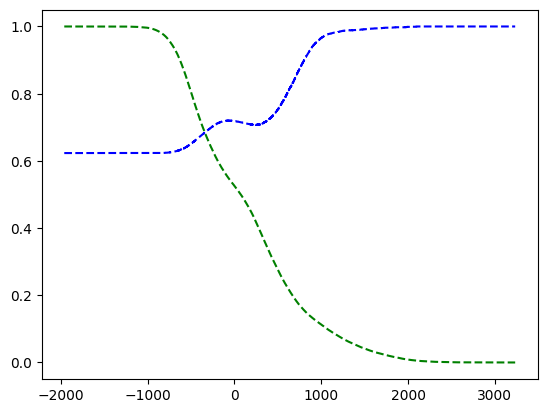

In [35]:
plt.plot(umbrales, precisions[:-1],"b--", label="Precision")
plt.plot(umbrales, recalls[:-1],"g--", label="Recalls")

## <span style="color:green">6. Prueba con archivo de test</span>

In [36]:
y_test_pred=rfc.predict(X_test)

In [37]:
resul= pd.DataFrame(y_test_pred)
resul= resul.rename(columns={0:"pred"})
resul.to_csv("mayteet.csv", index=False)
